# 1.Introdução
Neste projeto, utilizamos técnicas de machine learning para prever a probabilidade de um animal de estimação ser adotado em um abrigo. O objetivo é ajudar os abrigos a identificar quais pets têm maior chance de encontrar um lar, permitindo estratégias mais eficazes para promover a adoção.<br>
Etapas:<br>
-Coleta e Pré-processamento de Dados<br>
-Análise Exploratória de Dados<br>
-Desenvolvimento do Modelo<br>
-Avaliação e Interpretação dos Resultados<br>

# 2. Importando Bibliotecas

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# 3. Analisando estrutura do dataset

In [5]:
df = pd.read_csv('C:/DataSets/pet_adoption_data.csv')

In [6]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [7]:
df.shape

(2007, 13)

In [8]:
df.isna().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [10]:
df.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


# 4. Analise Exploratoria

# 4.1 Analise Univariada

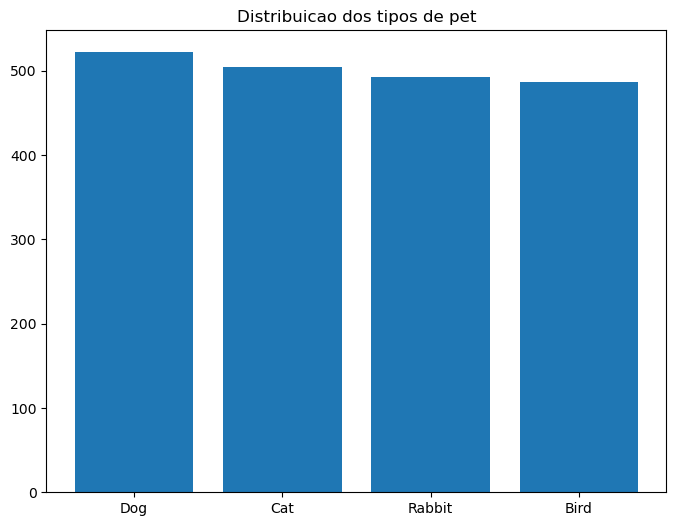

In [11]:
plt.figure(figsize = (8, 6))
plt.bar(df['PetType'].value_counts().index, df['PetType'].value_counts())
plt.title('Distribuicao dos tipos de pet')
plt.show()

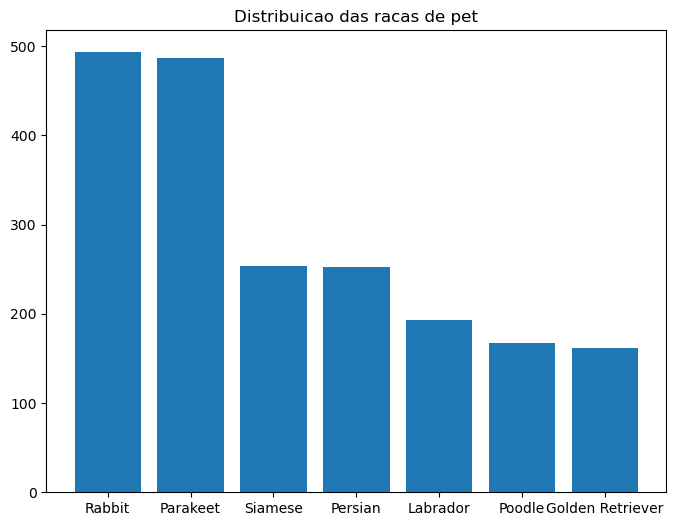

In [12]:
plt.figure(figsize = (8, 6))
plt.bar(df['Breed'].value_counts().index, df['Breed'].value_counts())
plt.title('Distribuicao das racas de pet')
plt.show()

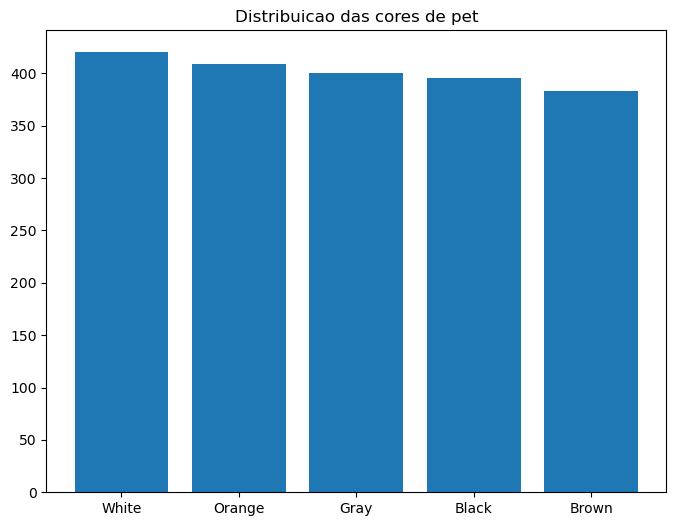

In [13]:
plt.figure(figsize = (8, 6))
plt.bar(df['Color'].value_counts().index, df['Color'].value_counts())
plt.title('Distribuicao das cores de pet')
plt.show()

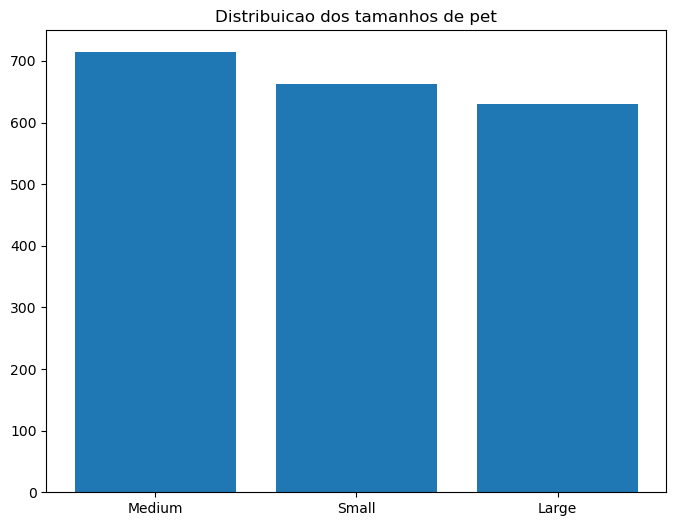

In [14]:
plt.figure(figsize = (8, 6))
plt.bar(df['Size'].value_counts().index, df['Size'].value_counts())
plt.title('Distribuicao dos tamanhos de pet')
plt.show()

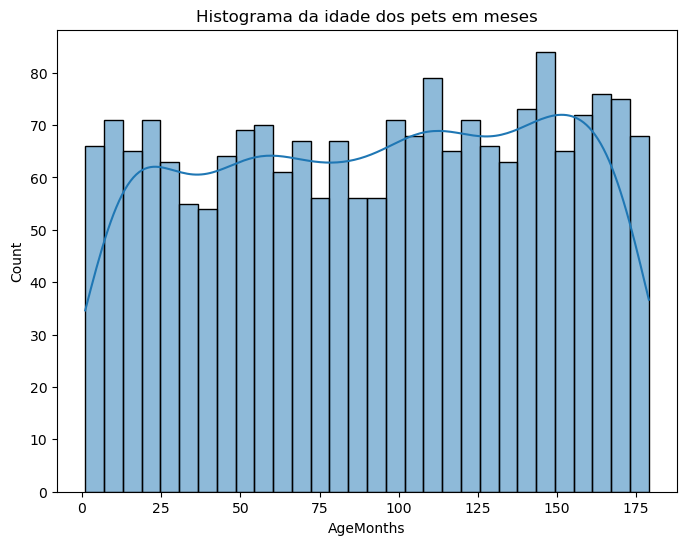

In [15]:
plt.figure(figsize = (8, 6))
sns.histplot(df['AgeMonths'], bins = 30, kde = True)
plt.title('Histograma da idade dos pets em meses')
plt.show()

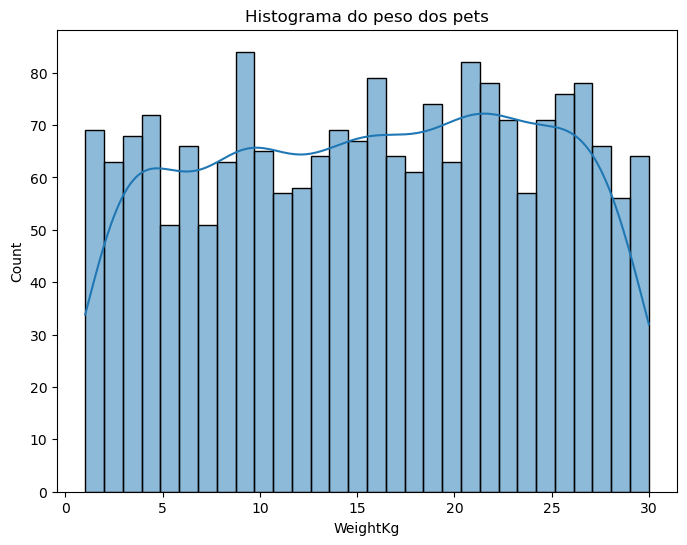

In [16]:
plt.figure(figsize = (8, 6))
sns.histplot(df['WeightKg'], bins = 30, kde = True)
plt.title('Histograma do peso dos pets')
plt.show()

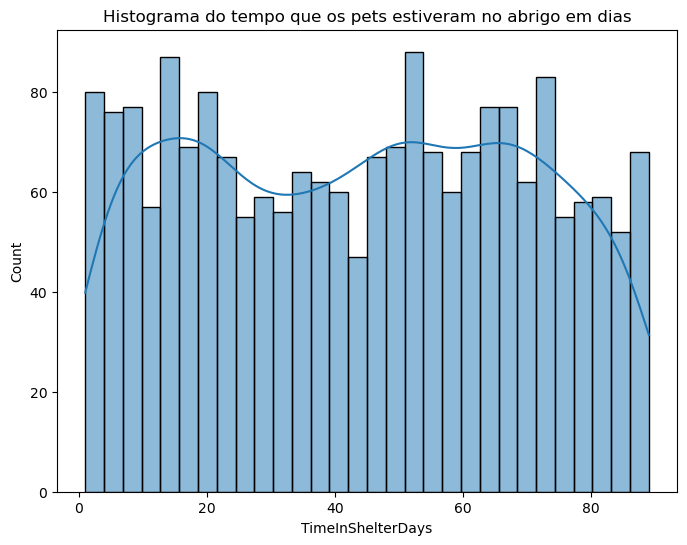

In [17]:
plt.figure(figsize = (8, 6))
sns.histplot(df['TimeInShelterDays'], bins = 30, kde = True)
plt.title('Histograma do tempo que os pets estiveram no abrigo em dias')
plt.show()

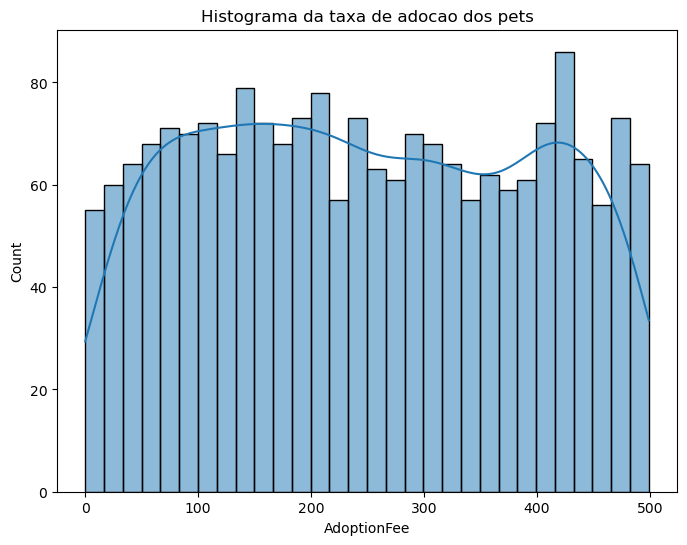

In [18]:
plt.figure(figsize = (8, 6))
sns.histplot(df['AdoptionFee'], bins = 30, kde = True)
plt.title('Histograma da taxa de adocao dos pets')
plt.show()

# 4.2 Analise Bivariada

In [19]:
type_adoption = df.groupby('PetType')['AdoptionLikelihood'].sum().sort_values(ascending = False)

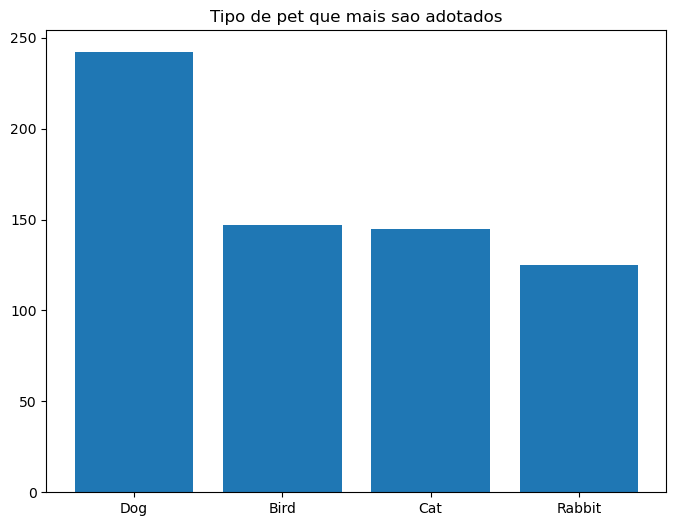

In [20]:
plt.figure(figsize = (8, 6))
plt.bar(type_adoption.index, type_adoption)
plt.title('Tipo de pet que mais sao adotados')
plt.show()

In [21]:
breed_adoption = df.groupby('Breed')['AdoptionLikelihood'].sum().sort_values(ascending = False)

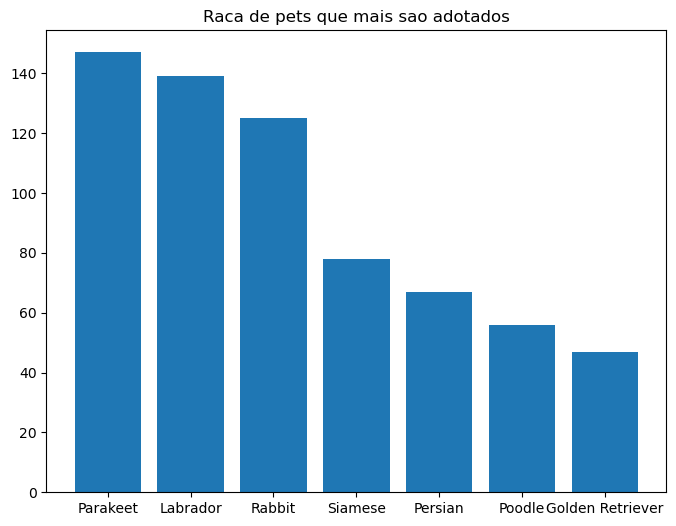

In [22]:
plt.figure(figsize = (8, 6))
plt.bar(breed_adoption.index, breed_adoption)
plt.title('Raca de pets que mais sao adotados')
plt.show()

In [23]:
color_adoption = df.groupby('Color')['AdoptionLikelihood'].sum().sort_values(ascending = False)

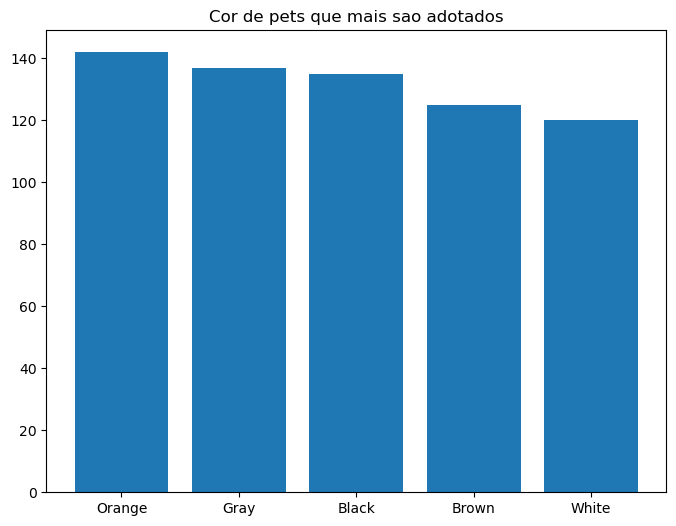

In [24]:
plt.figure(figsize = (8, 6))
plt.bar(color_adoption.index, color_adoption)
plt.title('Cor de pets que mais sao adotados')
plt.show()

In [25]:
size_adoption = df.groupby('Size')['AdoptionLikelihood'].sum().sort_values(ascending = False)

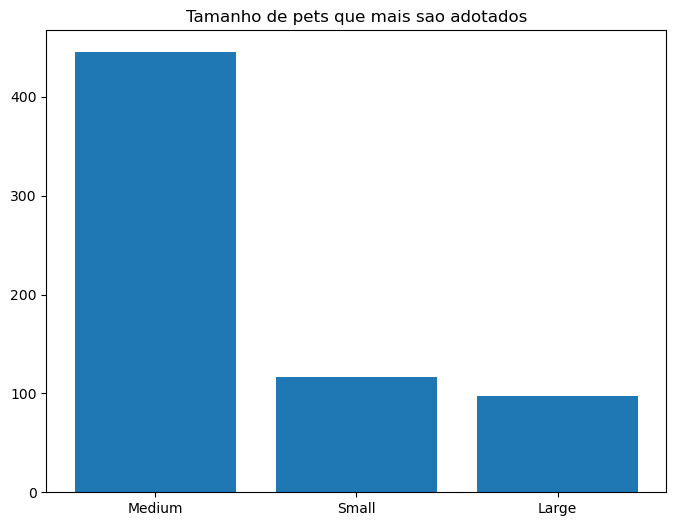

In [26]:
plt.figure(figsize = (8, 6))
plt.bar(size_adoption.index, size_adoption)
plt.title('Tamanho de pets que mais sao adotados')
plt.show()

In [27]:
age_adoption = df.groupby('AdoptionLikelihood')['AgeMonths']

colors = ['#1f77b4', '#ff7f0e']

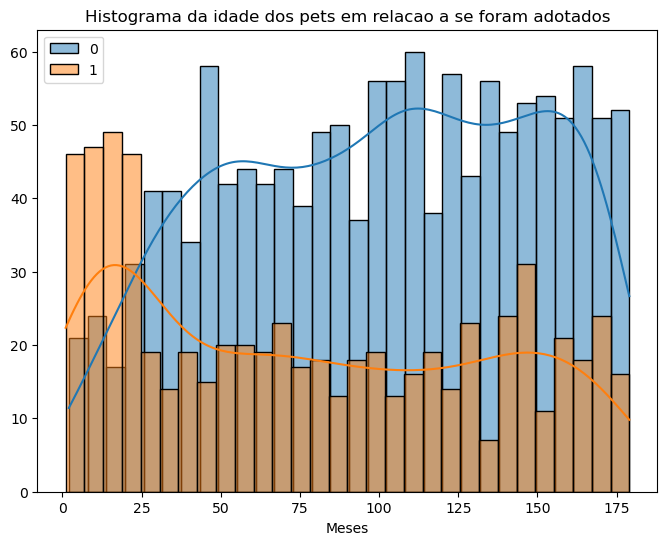

In [28]:
plt.figure(figsize = (8, 6))
for (adoption_likelihood, ages), color in zip(age_adoption, colors):
    sns.histplot(ages, bins = 30, kde = True, color = color, label = adoption_likelihood)
plt.title('Histograma da idade dos pets em relacao a se foram adotados')
plt.legend()
plt.xlabel('Meses')
plt.ylabel('')
plt.show()

In [29]:
weight_adoption = df.groupby('AdoptionLikelihood')['WeightKg']

colors = ['#1f77b4', '#ff7f0e']

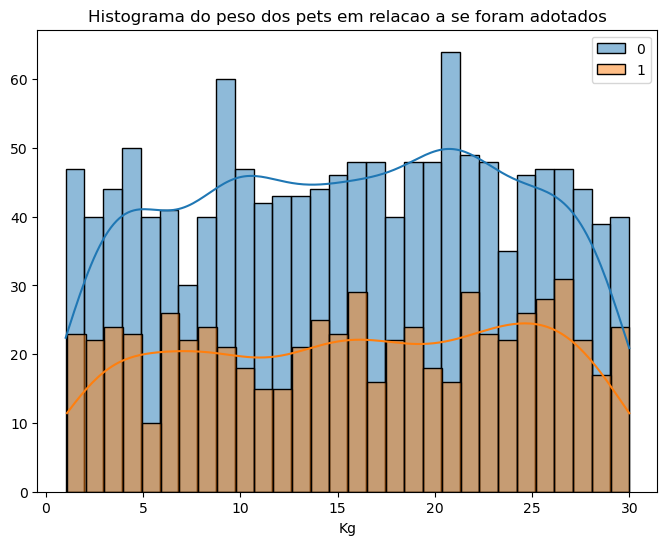

In [30]:
plt.figure(figsize = (8, 6))
for (adoption_likelihood, weight), color in zip(weight_adoption, colors):
    sns.histplot(weight, bins = 30, kde = True, color = color, label = adoption_likelihood)
plt.title('Histograma do peso dos pets em relacao a se foram adotados')
plt.legend()
plt.xlabel('Kg')
plt.ylabel('')
plt.show()

In [31]:
shelter_adoption = df.groupby('AdoptionLikelihood')['TimeInShelterDays']

colors = ['#1f77b4', '#ff7f0e']

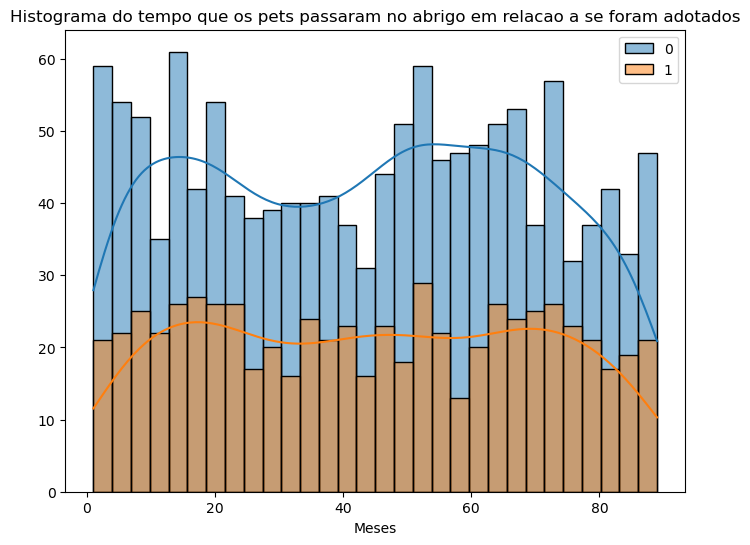

In [32]:
plt.figure(figsize = (8, 6))
for (adoption_likelihood, shelter), color in zip(shelter_adoption, colors):
    sns.histplot(shelter, bins = 30, kde = True, color = color, label = adoption_likelihood)
plt.title('Histograma do tempo que os pets passaram no abrigo em relacao a se foram adotados')
plt.legend()
plt.xlabel('Meses')
plt.ylabel('')
plt.show()

In [33]:
fee_adoption = df.groupby('AdoptionLikelihood')['AdoptionFee']

colors = ['#1f77b4', '#ff7f0e']

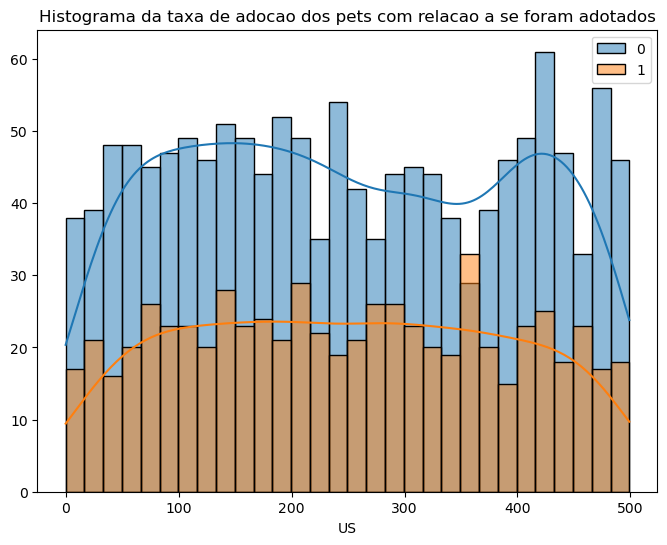

In [34]:
plt.figure(figsize = (8, 6))
for (adoption_likelihood, fee), color in zip(fee_adoption, colors):
    sns.histplot(fee, bins = 30, kde = True, color = color, label = adoption_likelihood)
plt.title('Histograma da taxa de adocao dos pets com relacao a se foram adotados')
plt.legend()
plt.xlabel('US')
plt.ylabel('')
plt.show()

In [35]:
vacin_adoption = df.groupby(['Vaccinated', 'AdoptionLikelihood']).size().unstack()

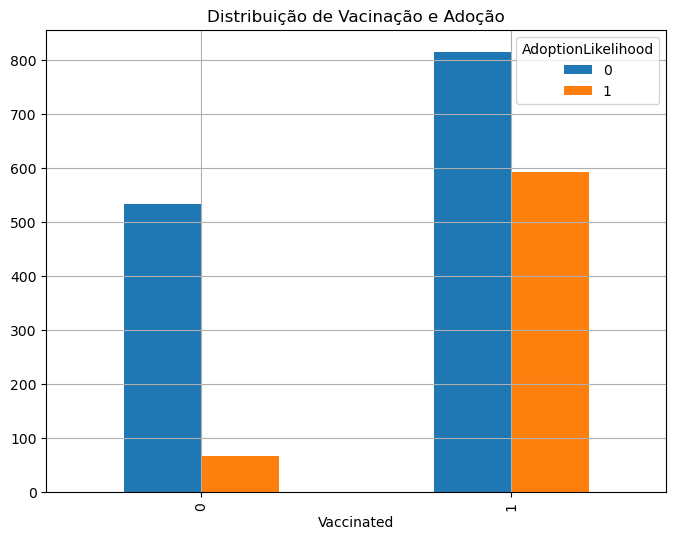

In [36]:
vacin_adoption.plot(kind='bar', figsize = (8, 6),  color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Vacinação e Adoção')
plt.grid(True)
plt.show()

In [37]:
health_adoption = df.groupby(['HealthCondition', 'AdoptionLikelihood']).size().unstack()

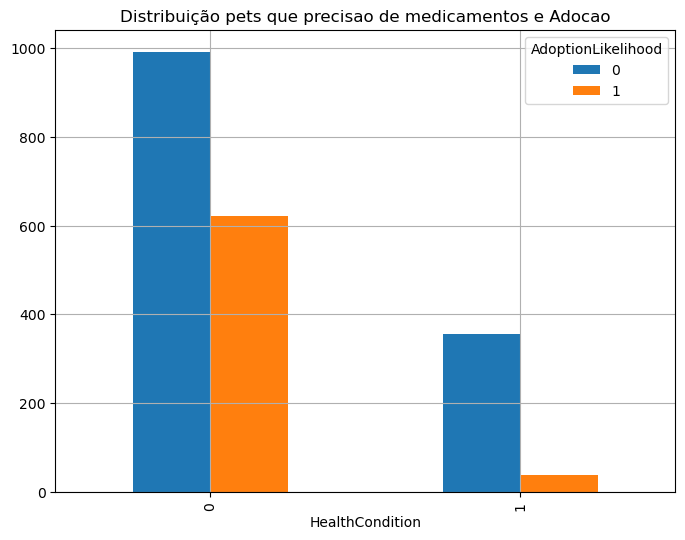

In [38]:
health_adoption.plot(kind='bar', figsize = (8, 6),  color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição pets que precisao de medicamentos e Adocao')
plt.grid(True)
plt.show()

In [39]:
owner_adoption = df.groupby(['PreviousOwner', 'AdoptionLikelihood']).size().unstack()

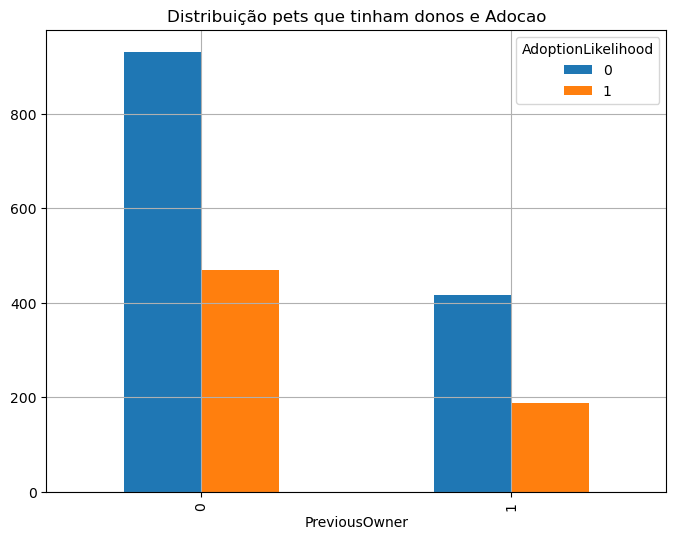

In [40]:
owner_adoption.plot(kind='bar', figsize = (8, 6),  color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição pets que tinham donos e Adocao')
plt.grid(True)
plt.show()

In [41]:
df['PetType'] = df['PetType'].map({'Bird': 0, 
                                   'Rabbit': 1, 
                                   'Dog': 2, 
                                   'Cat': 3})

In [42]:
df['Breed'] = df['Breed'].map({'Parakeet': 0, 
                               'Rabbit': 1, 
                               'Golden Retriever': 2, 
                               'Labrador': 3, 
                               'Siamese': 4,
                               'Persian': 5, 
                               'Poodle': 6})

In [43]:
df['Color'] = df['Color'].map({'Orange': 0, 
                               'White': 1, 
                               'Gray': 2, 
                               'Brown': 3, 
                               'Black': 4})

In [44]:
df['Size'] = df['Size'].map({'Large': 0, 
                             'Medium': 1, 
                             'Small': 2})

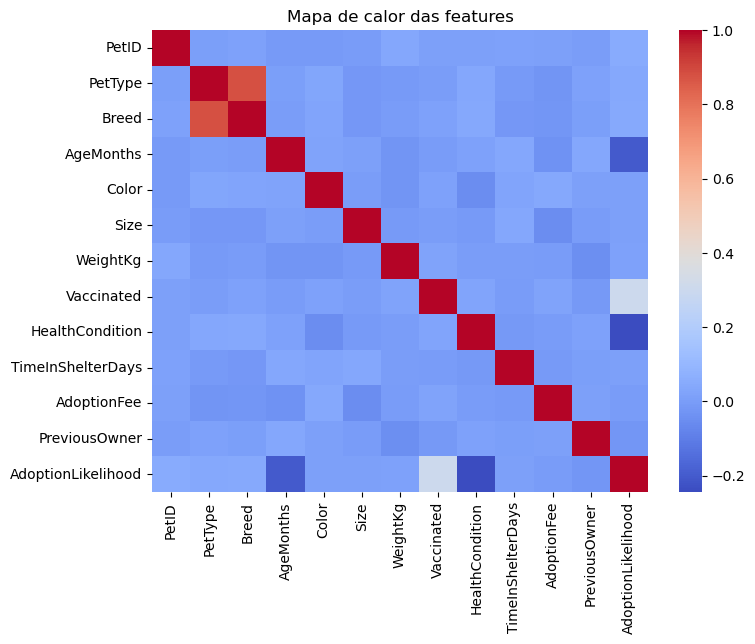

In [45]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.title('Mapa de calor das features')
plt.show()

# 5. Aplicando modelo de Machine Learning

# 5.1 Selecao de features

In [48]:
X = df[['Breed', 'AgeMonths', 'Size', 'Vaccinated', 'HealthCondition', 'PreviousOwner']]

y = df['AdoptionLikelihood']

# 5.2 Treinando modelo

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
modelRF = RandomForestClassifier(n_estimators = 500)

In [51]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [53]:
y_pred = modelRF.predict(X_test)

# 5.3 Avaliando modelo

In [52]:
modelRF.score(X_test, y_test)

0.9154228855721394

In [56]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [57]:
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precisão: 0.9157525556523949
Recall: 0.9154228855721394
F1-Score: 0.9143388343343624


In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [62]:
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[250  10]
 [ 24 118]]


# 6. Conclusão
Apos a analise exploratoria conseguimos obter varios insghts para nos ajudar a escolher o modelo que iriamos utilizar e as features. Como nossas variaveis tiveram uma baixa correlacao com nossa variavel alvo o modelo de Linear Regression nao seria ideal par utilizar entao optei pelo modelo Random Forest e com ajuda de graficos pude escolher as features que mais tem peso em nosso dataset, poderiamos ter colocado todas as colunas de nosso dataset no modelo mas seria um desperdicio de processamento que aumentaria no maximo 2.0% na acuracia do modelo e esta pratica se torna inviavel em datasets enormes com muitas colunas e linhas.